# Notebook for plotting AuxTel gains.

Adapted to AuxTel on 11 Apr 2022 by Johnny Esteves.\
Initially written 18 Feb 2022 by Craig Lage.

In [1]:
import sys, os, glob, time
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import lsst.daf.butler as dafButler

In [2]:
exposure1 = 2021021700096
butler1 = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib",
                                                      "u/cslage/latiss/ptc_20210217"])

exposure2 = 2022040500096
butler2 = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib",
                                                      "u/jesteves/latiss/ptc_20220405"])


In [3]:
RAFT = 'RXX'
butlers = [butler1, butler2]
exposures = [exposure1, exposure2]
run_names = ['2021-02-17-Empty', '2022-04-05-Rband']
markers = ['o', 'x', '+', '*', '^', 'v']

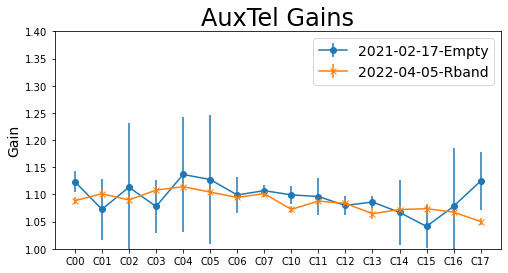

In [4]:
plt.figure(figsize=(8,4))
plt.title("AuxTel Gains", fontsize=24)
for i,butler in enumerate(butlers):
    run_name = run_names[i]
    ptcDataset = butler.get('ptc', exposure=exposures[i], detector=0)
    gain_data = ptcDataset.gain
    gain_err_data = ptcDataset.gainErr
    amps = gain_data.keys()
    gains = []
    gain_err = []
    amp_nums = []
    for ii, amp in enumerate(amps):
        gains.append(gain_data[amp])
        gain_err.append(gain_err_data[amp])
        amp_nums.append(ii)
    plt.errorbar(amp_nums, gains, yerr=gain_err, marker = markers[i], label = run_name)
    plt.ylim(1.0, 1.4)
    plt.ylabel("Gain", fontsize = 14)
    plt.xticks(amp_nums,amps, fontsize=10)
    plt.legend(loc = 'upper right', fontsize = 14)
plt.savefig('./plots/Gain_Summary_11Apr22.pdf',dpi=100)
